                      Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
                                            
####                 Приложение к отчету по лабораторной работе "Численное решение систем линейных уравнений, численное интегрирование"

                                              
                                                 Вариант 2
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                               Выполнила: Зибаова Александра, 430 гр.
                                                                               Проверил: Шиндин А. В.

                                         Нижний Новгород, 2016 год.
                                    

###  Содержание
1. Постановка задачи
2. Цели работы
3. Описание используемых алгоритмов
4. Исходный код программы
5. Результаты работы программы
6. Анализ результатов 


###   1. Постановка задачи.
1. Выбрать свой вариант системы (номер варианта остается с предыдущей лабораторной работы). Кроме самой системы в варианте должны быть указаны:
 * число уравнений системы
 * требуемый метод/методы решения системы
 * необходимая относительная точность решения системы
 * требуемый метод вычисления интеграла
 * необходимая относительная точность вычисления интеграла (если не указана, то брать — 0,01).

2.  Вычислить определенный интеграл двумя методами
 * Заданным методом
 * С помощью функции numpy.trapz(…), графически провести сравнение с результатами предыдущего метода. Разницу объяснить.

3. Построить график подынтегральной функции, а также график зависимости значения интеграла от номера итерации предлагаемого метода численного интегрирования.

4. Решить систему заданным методом 

 * Для 10000 уравнений

5. Построить график решения X(i), а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы.

6. Решить систему с помощью функции numpy.linalg.solve(…). Результат графически сравнить с решением, полученным в пункте 4. Разницу объяснить.

###   2. Цель работы
* Освоить методы численного интегрирования. Вычислить определенный интеграл с использованием **рекуррентной формулы Буля** с относительной точностью **0,01**
* Научиться численно решать системы линейных уравнений. Решение систему из 1000 и 10000 уравнений **методом прогонки** и **методом Гаусса-Зейделя** с относительной точностью **0,001**.

## Рассматриваемая система уравнений имеет вид:
$$x_1=0.1*x_2$$
$$(2*i+1)*x_{i-1}-(6*i^2+3)*x_i+(4*i+2)*x_{i+1}=\int\limits_0^1\frac{e^{-i^2*t}}{1+i*t*sin(t)^2}\,dt, i=2,3,\ldots,n$$
$$x_n=0.5*x_{n-1}$$

###   3. Описание используемых алгоритмов
Содержится в основной части отчета

###   4. Исходный код программы

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as integrate
import numpy.linalg as lin
%matplotlib inline
print('kek')

kek


In [3]:
def f(x,j):
    return math.exp(-x*j**2)/(1+j*x*math.sin(x**2))
k=int(input('nomer yravneniya'))
def fst(x):
    return f(x,k)
xst = np.arange(0,1,0.01)
yst = [fst(l) for l in xst]
print('kek')

nomer yravneniya7
kek


In [1]:
def summ(p,k):
    tz=0; e=0; Integ=0
    for o in range(0,p):
        tz=o/p
        e+=1/p
        Integ+=(e-tz)/90*(7*f(tz,k)+32*f((3*tz+e)/4,k)+12*f((tz+e)/2,k)+32*f((tz+3*e)/4,k)+7*f(e,k))
    return Integ  

def integral(k):
    N=2
    p=summ(1,k)
    while math.fabs((summ(N,k)-summ(N-1,k))/summ(N-1,k))>0.01:
        N=N+1
        p=summ(N-1,k)
    print('Номер интерации: ',N)
    return p    
def integral1(k):
    N=2
    p=summ(1,k)
    while math.fabs((summ(N,k)-summ(N-1,k))/summ(N-1,k))>0.01:
        N=N+1
        p=summ(N-1,k)
    return p   

In [5]:
NTR=np.trapz(yst, x=None, dx=0.01)
print('kek')

kek


In [6]:
NN=int(input('kolichestvo yravnenyi sistemy'))
NNN=int(input('kolichestvo it'))
#Коэффициенты уравнений#
A=np.zeros((N,N))
A1=np.zeros((N,3))
A[0,0]=A1[0,1]=1
A[0,1]=A1[0,2]=-0.1
A[N-1,N-1]=A1[N-1,1]=-1
A[N-1,N-2]=A1[N-1,0]=0.5
for i in range (2,N):
    A[i-1,i-2]=A1[i-1,0]=2*i+1
    A[i-1,i-1]=A1[i-1,1]=-6*i**2-3
    A[i-1,i]=A1[i-1,2]=4*i+2
#Правые части уравнений#    

B=np.zeros((N))
for i in range (2,N):
    B[i-1]=integral1(i)
def f2(x):
    return f(x,7)
print('kek')

kolichestvo yravnenyi sistemy10000
kolichestvo it100
kek


In [7]:
L=np.zeros((N))
M=np.zeros((N))
Xpodg=np.zeros((N))
L[1]=-A1[0,2]/A1[0,1]
M[1]=B[0]/A1[0,1]
for i in range (2,N):
    L[i]=-A1[i-1,2]/(A1[i-1,0]*L[i-1]+A1[i-1,1])
    M[i]=(B[i-1]-M[i-1]*A1[i-1,0])/(A1[i-1,0]*L[i-1]+A1[i-1,1])
Xpodg[N-1]=(B[N-1]-M[N-1]*A1[N-1,0])/(L[N-1]*A1[N-1,0]+A1[N-1,1])
for i in range (1,N):
    Xpodg[N-i-1]=L[N-i]*Xpodg[N-i]+M[N-i]
print('kek')

kek


In [8]:
Ln=np.zeros((N,N))
D=np.zeros((N,N))
for i in range (0,N):
    D[i,i]=A[i,i]
for i in range(0,N):
    for j in range (0,i):
        Ln[i,j]=A[i,j]
R=A-D-Ln
H=D+Ln
Hi=lin.inv(H)
Bt=np.zeros((N,1))
for i in range(0,N):
    Bt[i,0]=B[i]
k1=np.dot(Hi,Bt)
k2=-np.dot(Hi,R)
print('kek')

kek


In [9]:

Xgz0=np.zeros((N,1))
iter_GZ=int(input('iterazii'))
Norm=[]
nor0=0; konets=0
for i in range(0,iter_GZ):
    Xgz =np.dot(k2,Xgz0)+k1
    nor=lin.norm(Xgz)
    Norm.append(nor)
    if (nor-nor0)/nor<0.00001:
        break
    else:    
        nor0=nor
        Xgz0=Xgz
        konets=i
print('kek')

iterazii100
kek


In [10]:
Xpy=lin.solve(A,B)
print('kek')

kek


###   5. Результат работы программы
* Для вычисления интеграла

График подынтегральной функции для выбранного интеграла


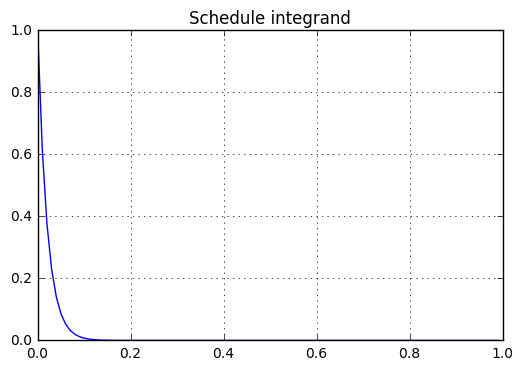

График зависимости значения интеграла от номера итерации в методе Буля


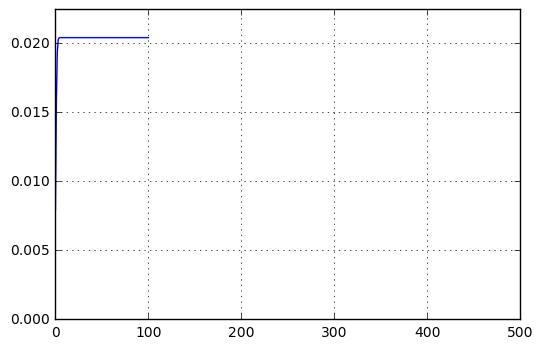

Значение интеграла в результате вычисления методом Буля
0.020400990056163262
Значение интеграла в результате вычисления с помощью numpy.trapz
0.0208076364541
kek


In [11]:
print(('График подынтегральной функции для выбранного интеграла'))
plt.plot(xst,yst)
plt.title('Schedule integrand')
plt.grid()
plt.show()
print(('График зависимости значения интеграла от номера итерации в методе Буля'))
plt.plot(X)
plt.axis([0, 500, 0, max(X)+max(X)/10])
plt.grid()
plt.show()
print('Значение интеграла в результате вычисления методом Буля')
print(max(X))
print('Значение интеграла в результате вычисления с помощью numpy.trapz')
print(NTR)
print('kek')

* Для системы уравнений

График решения X(i)


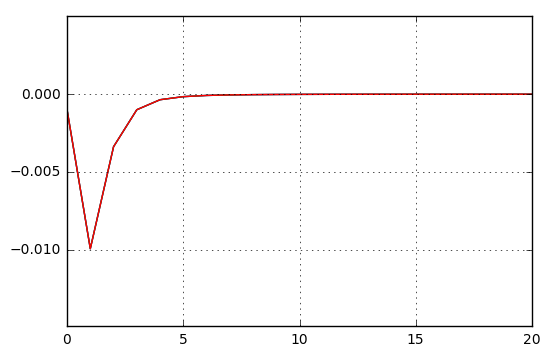

Или, при увеличении масштаба:


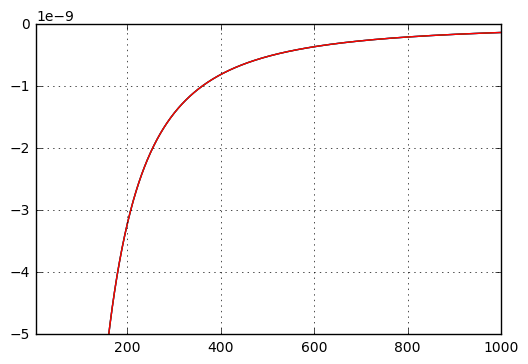

График зависимости нормы решения от номера итерации:


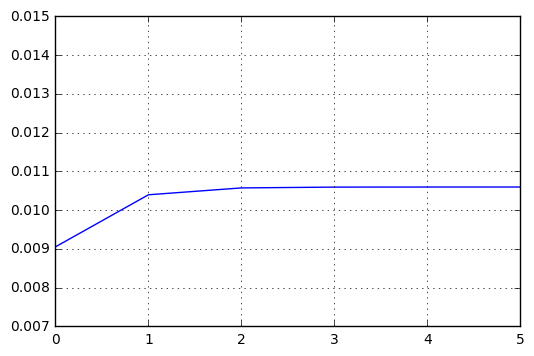

kek


In [13]:
print(('График решения X(i)'))
plt.plot(Xpy)
plt.plot(Xpodg)
plt.plot(Xgz0)
plt.axis([0, 20, min(Xpy)-0.005, max(Xpy)+0.005])
plt.grid()
plt.show()
print(('Или, при увеличении масштаба:'))
plt.plot(Xpy)
plt.plot(Xpodg)
plt.plot(Xgz0)
plt.axis([5, 1000, -0.000000005, 0])
plt.grid()
plt.show()
print(('График зависимости нормы решения от номера итерации:'))
plt.plot(Norm)
plt.axis([0, konets, 0.007, 0.015])
plt.grid()
plt.show()
print('kek')

###   6. Анализ результатов
Совпадает с написанным в основной работе (для 1000 уравнений)